<a href="https://colab.research.google.com/github/abdullahkrs/e-Portfolio-Machine-Learning-January-2025/blob/main/Unit06_KMeans_Iris_TaskA_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🌸 Unit 6 Seminar: K-Means Clustering on Iris Dataset

This notebook performs **K-Means Clustering** on the classic **Iris dataset**.

---

## 📌 Task A: Iris Data Clustering
- Load `iris.csv`
- Remove the `species` column for clustering
- Apply **KMeans** clustering with **K=3**
- Compare clusters to actual species
- Visualize results with a scatter plot

---


In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from google.colab import files
import io

# Upload iris.csv
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Unit06_iris.csv']))

# Display first few rows
df.head()


Saving Unit06_iris.csv to Unit06_iris.csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:

# Separate features and labels
X = df.drop('species', axis=1)
y = df['species']

# Apply KMeans clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Show cluster assignments
df[['species', 'cluster']].head()


,species,cluster
0,setosa,1
1,setosa,1
2,setosa,1
3,setosa,1
4,setosa,1


In [7]:

# Confusion matrix
from sklearn.preprocessing import LabelEncoder

# Encode species to numeric labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Compute confusion matrix
conf_mat = confusion_matrix(y_encoded, df['cluster'])

# Create readable DataFrame
conf_mat_df = pd.DataFrame(
    conf_mat,
    index=le.classes_,
    columns=['Cluster 0', 'Cluster 1', 'Cluster 2']
)
conf_mat_df



,Cluster 0,Cluster 1,Cluster 2
setosa,0,50,0
versicolor,3,0,47
virginica,36,0,14


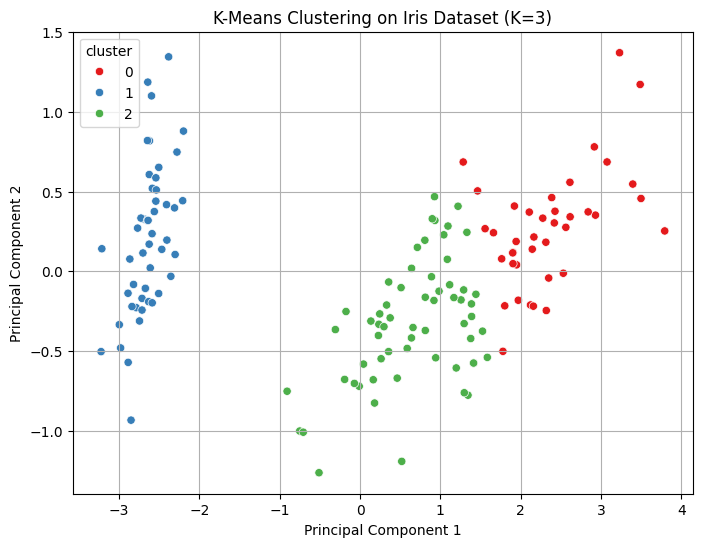

In [8]:

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X)

df['pca1'] = components[:, 0]
df['pca2'] = components[:, 1]

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set1')
plt.title("K-Means Clustering on Iris Dataset (K=3)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()



## ✅ Summary

- KMeans successfully clustered the Iris dataset into 3 groups.
- We compared the clustering results to actual species labels using a **confusion matrix**.
- Visualization in 2D (via PCA) shows well-separated clusters.
- This task demonstrates how unsupervised clustering can approximate real labels when natural grouping exists.

---
